In [10]:
%matplotlib inline 
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcess
from sklearn.grid_search import GridSearchCV
from sklearn import cross_validation
from sklearn import grid_search

In [7]:
from process_data import process_data
from process_data import get_date_range

In [8]:
price_frame = process_data()
df_price_frame = price_frame.set_index("time")
df_price_frame.head()

,lmp_value,hour,day,month,summary,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windBearing,cloudCover,visibility
time,,,,,,,,,,,,,,,,
2016-01-01 07:00:00,30.56196,7,4,1,5,0.0,0.0,36.78,33.10,32.47,0.84,1020.18,4.53,111.0,0.00,9.69
2016-01-01 08:00:00,32.26382,8,4,1,5,0.0,0.0,39.36,34.56,33.89,0.81,1020.67,6.69,112.0,0.00,9.59
2016-01-01 09:00:00,30.84944,9,4,1,5,0.0,0.0,46.70,43.65,35.51,0.65,1021.00,6.16,119.0,0.01,9.61
2016-01-01 10:00:00,30.71027,10,4,1,5,0.0,0.0,52.42,52.42,35.37,0.52,1021.58,3.27,105.0,0.00,9.80
2016-01-01 11:00:00,28.87975,11,4,1,5,0.0,0.0,55.66,55.66,37.79,0.51,1021.44,1.78,339.0,0.17,9.92


In [9]:
x_train, y_train, x_test, y_test = get_date_range(df_price_frame, '2016-01-01', '2016-03-01', '2016-03-01', '2016-03-05')

In [12]:
theta_range = range(1, 4, 1)
nugget_range = [x * 0.1 for x in range(0, 10)]
tuned_parameters = [{
    'theta0': theta_range,
    'nugget': nugget_range
    }]

gm_price = GridSearchCV(GaussianProcess(), param_grid=tuned_parameters, verbose=0)
y_pred = gm_price.fit(x_train, y_train).predict(x_test)

print 'Optimum parameters epsilon and kernel for gm: ', gm_price.best_params_

print "The test score R2 for SVR: ", gm_price.score(x_test, y_test)

print("SVR mean squared error: %.2f"
      % np.mean((y_test - gm_price.predict(x_test)) ** 2))

/usr/local/lib/python2.7/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GaussianProcess is deprecated; GaussianProcess was deprecated in version 0.18 and will be removed in 0.20. Use the GaussianProcessRegressor instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GaussianProcess is deprecated; GaussianProcess was deprecated in version 0.18 and will be removed in 0.20. Use the GaussianProcessRegressor instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GaussianProcess is deprecated; GaussianProcess was deprecated in version 0.18 and will be removed in 0.20. Use the GaussianProcessRegressor instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function l1_cross

Optimum parameters epsilon and kernel for gm:  {'nugget': 0.2, 'theta0': 1}
The test score R2 for SVR:  -1.07652628598
SVR mean squared error: 84.00


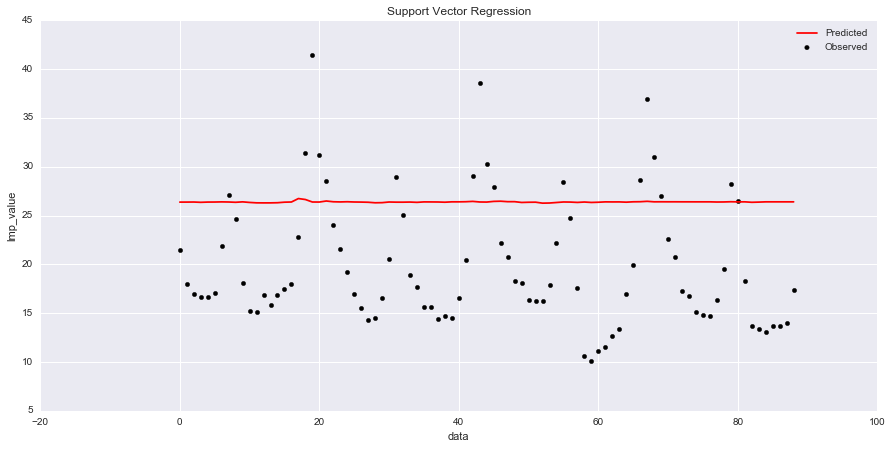

In [13]:
fig = plt.figure(figsize=(15,7))
plt.scatter(x_test.index, y_test, c='k', label='Observed')
plt.plot(x_test.index, y_pred, c='r', label='Predicted')
plt.xlabel('data')
plt.ylabel('lmp_value')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

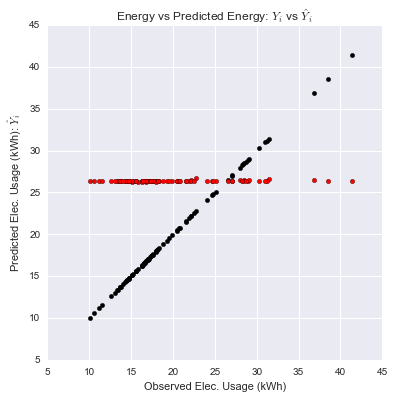

In [14]:
fig = plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test, c='k')
plt.scatter(y_test, y_pred, c='r')
plt.xlabel('Observed Elec. Usage (kWh)')
plt.ylabel("Predicted Elec. Usage (kWh): $\hat{Y}_i$")
plt.title("Energy vs Predicted Energy: $Y_i$ vs $\hat{Y}_i$")